<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2019

En este notebook aplicamos una red neuronal en Keras a un dataset de clasificación.

Agenda:

1. Funciones de activación.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


<hr>

## 1. Funciones de activación

In [3]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [3]:
z = np.array([0.8, 10.4, 3.2, 1.1])
print(np.round(sigmoid(z)))
print(np.round(softmax(z)))

[1. 1. 1. 1.]
[0. 1. 0. 0.]


### Trabajemos

Pruebe la función de activación softmax con una entrada $z = [0.1, -1.4, 3.2, 1.1]$.

__Resultado esperado__: $[0,0,1,0]$

In [ ]:
#Completar el codigo
z = None
print(None)

<hr>

## Recordemos

Construcción de una red neuronal simple en Keras

In [4]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0], [1], [1], [0]])

In [5]:
model = keras.Sequential()

capa1 = keras.layers.Dense(units=5, activation='sigmoid', input_dim=2) #Dense = capas totalmente conectadas
model.add(capa1)

capa2 = keras.layers.Dense(units=1, activation='sigmoid')
model.add(capa2)

opt = keras.optimizers.RMSprop(lr=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy')

history = model.fit(X, Y, epochs=3000, verbose=False)

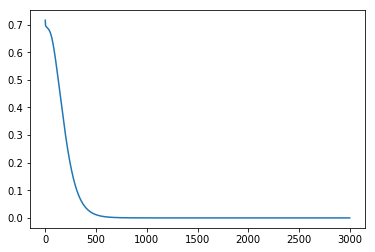

In [6]:
plt.plot(history.history['loss'])
plt.show()

In [7]:
model.evaluate(X,Y)

4/4 [==============================] - 0s 9ms/step


1.0960467022869125e-07

<hr>

## MNIST Fashion Dataset --> Multiclass Classification

In [8]:
mnist = keras.datasets.fashion_mnist

In [9]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(training_labels.shape)
print("Categorias del dataset: ",np.unique(training_labels))

(60000, 28, 28)
(60000,)
('Categorias del dataset: ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


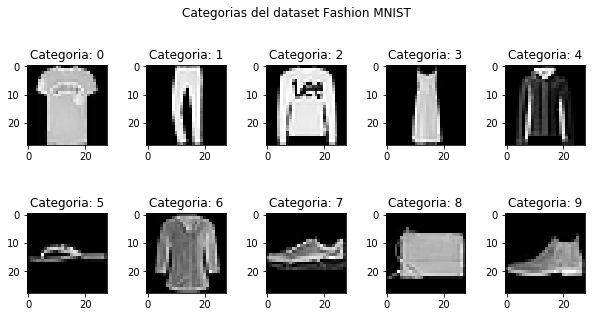

In [10]:
#Despleguemos ejemplos del dataset por categoria

fig = plt.figure(figsize=(10,5))
fig.suptitle("Categorias del dataset Fashion MNIST")
plt.subplots_adjust(wspace=0.5)

for j in range(10): #10 categorias
    for i in range(10000): #60000 ejemplos en el dataset de prueba
        if(test_labels[i] == j):
            plt.subplot(2,5,j+1)
            plt.title("Categoria: "+str(j))
            plt.imshow(test_images[i], cmap='gray')
            break
plt.show()

In [11]:
training_images[0].shape

(28, 28)

In [12]:
np.min(training_images[0])

0

In [13]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [14]:
#Normalizacion de los datos
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [15]:
model = keras.Sequential()

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [16]:
optimizer = keras.optimizers.Adam(lr=0.0001) #si utilizamos RMSProp?

model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.5844 - acc: 0.8037
Epoch 2/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.4080 - acc: 0.8572
Epoch 3/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.3687 - acc: 0.8693
Epoch 4/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.3427 - acc: 0.8775
Epoch 5/5
60000/60000 [==============================] - 19s 311us/step - loss: 0.3247 - acc: 0.8833


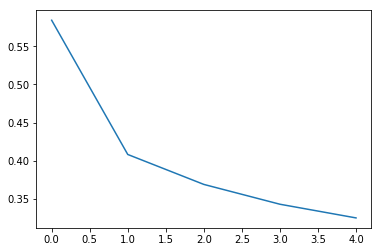

In [17]:
plt.plot(history.history['loss'])
plt.show()

In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 85us/step


[0.3651870838880539, 0.8697]

8


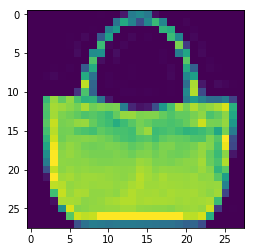

In [19]:
img = training_images[100]
print(training_labels[100])
plt.imshow(img)
plt.show()

In [20]:
img = training_images[100]
img = img.reshape(1,28,28)

pred = model.predict(img)
print(np.argmax(pred))


8


In [21]:
np.argmax(np.array([1,2,3,-1,10,4]))

4

<hr>

## Trabajemos

1. ¿Qué desventaja tiene la capa Flatten para la clasificación de imágenes? ¿Funciona el sistema visual humano de esta forma?
2. Evalúe distintos valores de tasa de aprendizaje y discuta su impacto en el entrenamiento y en el error obtenido.
3. Evalúe distintos números de neuronas en la penúltima capa y discuta su impacto en el entrenamiento y en el error obtenido.
4. Evalúe distintos números de capas y neuronas en cada capa y discuta su impacto en el entrenamiento y en el error obtenido.
5. Ingrese una imagen de entrada al modelo ya entrenado e imprima la clase predicha.